#Color Selection

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [149]:
# Read in the image and print out some stats
#image = mpimg.imread('/home/octo/Desktop/SDC/test.jpg')
image = mpimg.imread('test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [204]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
print('xsize:',xsize,'ysize: ',ysize)

xsize: 960 ysize:  540


In [135]:
# Define our color selection criteria
red_threshold =200
green_threshold =200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

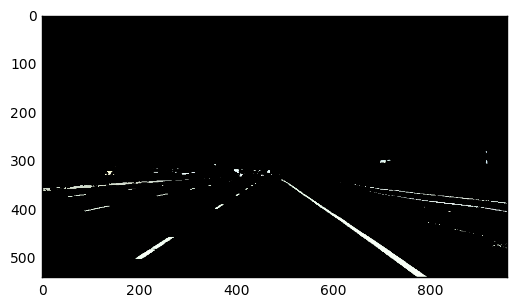

In [136]:
# Use a "bitwise OR" to identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)

#Region Selection

In [592]:
# Read in the image and print out some stats
#image = mpimg.imread('/home/octo/Desktop/SDC/test.jpg')
image = mpimg.imread('test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [593]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

In [594]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [115, 539]
right_bottom = [820,539]
apex = [470,325]

In [595]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [596]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [597]:
# Color pixels red which are inside the region of interest
region_select[~region_thresholds] = [0,0,0]
region_select[thresholds] = [0,0,0]

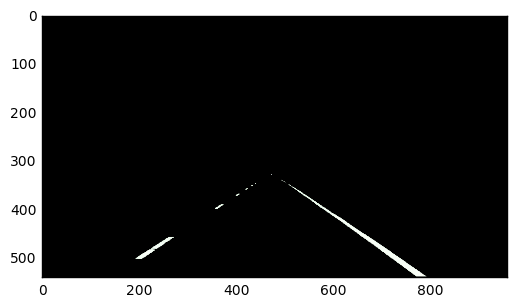

In [598]:
# Display the image
plt.imshow(region_select)

#Region and Line

In [630]:
# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

In [631]:
#Define our color criteria
red_threshold = 200
green_threshold =200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [632]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [820,539]
apex = [470,325]

In [633]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [634]:
# Perform a "bitwise or" to mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [635]:
# Mask color selection
color_select[~region_thresholds] = [0,0,0]
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [200,0,0]

In [604]:
#color_select[~region_thresholds] = [0,0,0]

In [606]:
#color_select[color_thresholds] = [0,0,0]

In [628]:
## Another way of using "|"

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

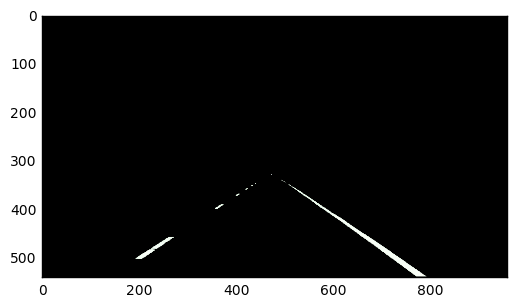

In [636]:
# Display our two output images
plt.imshow(color_select)

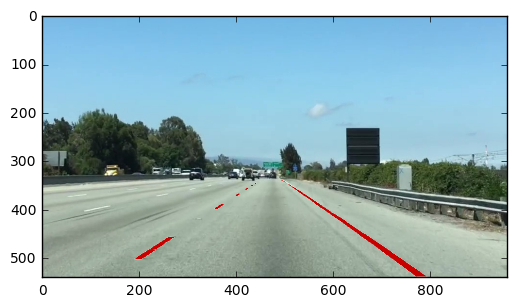

In [533]:
plt.imshow(line_image)

QUIZ

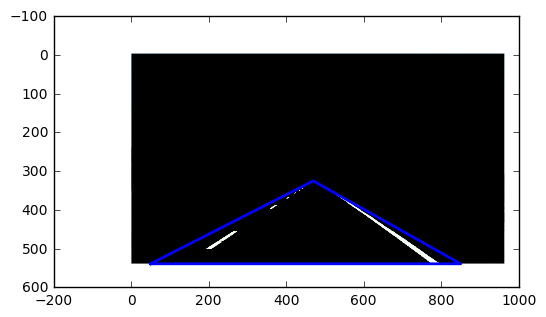

In [973]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print out some stats
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
#image = (mpimg.imread('test.jpg')*255).astype('uint8')
image = mpimg.imread('test.jpg')
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [50, 539]
right_bottom = [850,539]
apex = [470,325]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Perform a "bitwise or" to mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
# Display the image and show region and color selections
plt.imshow(image)
plt.imshow(color_select)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b', lw=2)

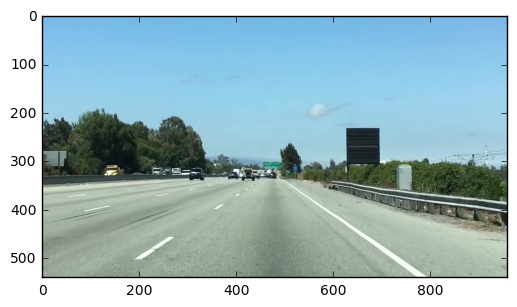

In [974]:
plt.imshow(image)

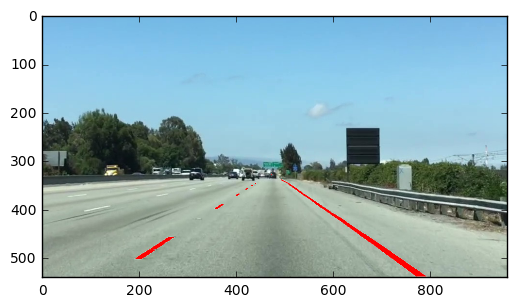

In [969]:
plt.imshow(line_image)

COMPUTER VISION

https://www.udacity.com/course/introduction-to-computer-vision--ud810

http://opencv.org/

Canny Edge Detection in Action

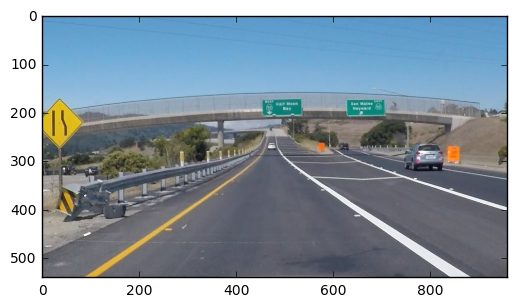

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)

convert to grayscale

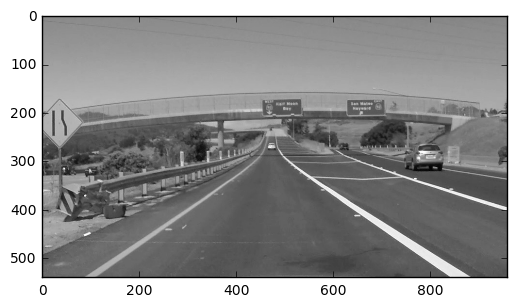

In [5]:
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

In [6]:
# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

In [7]:
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold =75
high_threshold =150

In [8]:
#Canny edge detector on this image. This is where OpenCV gets useful.
#First, we'll have a look at the parameters for the OpenCV Canny function. You will call it like this:
edges = cv2.Canny(gray, low_threshold, high_threshold)

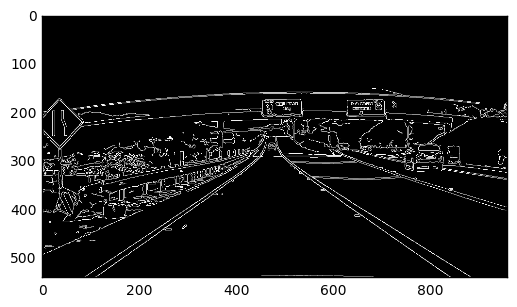

In [9]:
# Display the image
plt.imshow(edges, cmap='Greys_r')

Hough Transform on Edge Detected Image

In [10]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines 

 Python: cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) → lines
    Parameters:	

        image – 8-bit, single-channel binary source image. The image may be modified by the function.
        lines – Output vector of lines. Each line is represented by a 4-element vector (x_1, y_1, x_2, y_2) , where (x_1,y_1) and (x_2, y_2) are the ending points of each detected line segment.
        rho – Distance resolution of the accumulator in pixels.
        theta – Angle resolution of the accumulator in radians.
        threshold – Accumulator threshold parameter. Only those lines are returned that get enough votes ( >\texttt{threshold} ).
        minLineLength – Minimum line length. Line segments shorter than that are rejected.
        maxLineGap – Maximum allowed gap between points on the same line to link them.

In [11]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [12]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [13]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

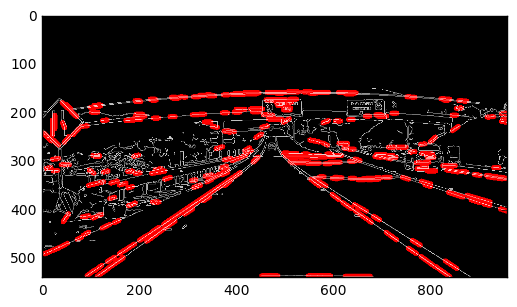

In [702]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

NEXT:
optimizing the detection of the lane lines

apply a region of interest mask to filter out detected line segments in other areas of the image

QUIZ

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [15]:
# Read in and grayscale the image
# Note: in the previous example we were reading a .jpg 
# Here we read a .png and convert to 0,255 bytescale
image = (mpimg.imread('exit-ramp.jpg')*255).astype('uint8')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [16]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [17]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [18]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255

In [19]:
import math
# This time we are defining a four sided polygon to mask
imshape = image.shape
len(imshape)

3

In [20]:
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(20,imshape[0]),(450,290), (490,290), (imshape[1],imshape[0])]], dtype=np.int32)
print('with dimensions:',vertices)

with dimensions: [[[ 20 540]
  [450 290]
  [490 290]
  [960 540]]]


In [21]:
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

In [22]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length =40 #minimum number of pixels making up a line
max_line_gap =20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

In [23]:
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [24]:
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [25]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

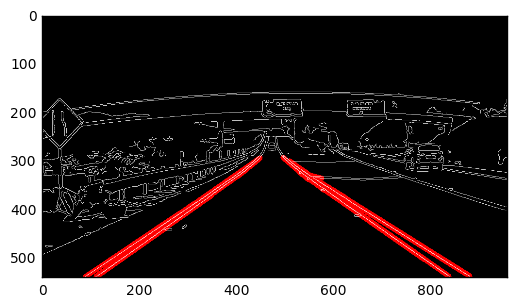

In [26]:
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges,0.8, line_image, 1, 0) 
plt.imshow(lines_edges)